## Desafío - Clasificación desde Machine Learning

Nombre: **Verónica Martínez**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *Grupo "por Confirmar": @Ale, @hugopriest, @Vero*&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Generación **G4**

Profesor: Josué Fredes

### Descripción
En esta sesión trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
- `default` : Variable binaria. Registra si el cliente entró en morosidad o no.
- `income`: Ingreso promedio declarado por el cliente.
- `balance`: Total de saldo en la cuenta de crédito.
- `student`: Variable binaria. Registra si el cliente es estudiante o no.


### Desafío 1: Preparación del ambiente de trabajo
- Importe los módulos básicos para el análisis de datos  
- Importe `seaborn`  
- Importe `statsmodels`
- Importe `LogisticRegression`, `train_test_split`, `StandardScaler`, `classification_report` y `roc_curve` de `sklearn`

In [1]:
# Importamos las librerías clásicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importamos statsmodels para generar modelos de regresión
import statsmodels.api as sm
import statsmodels.formula.api as smf

# importamos módulos de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  #segmentación de muestras
from sklearn.preprocessing import StandardScaler  #estandarizar variables (resta la media y divide por varianza de la variable)
from sklearn.metrics import classification_report, roc_curve

In [2]:
# realizamos la ingesta de los datos del archivo
df = pd.read_csv('default_credit.csv')
df.head()

,index,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


.  
### Desafío 2: Análisis exploratorio
Explore las principales relaciones entre las variables. Utilizando los métodos `boxplot` y `lmplot` de `seaborn` implemente los siguientes gráficos:
- **Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.**

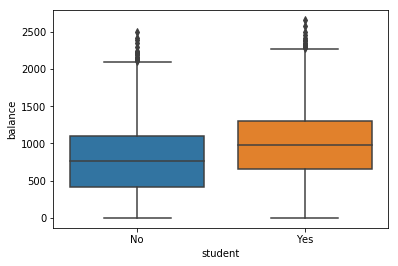

In [3]:
ax = sns.boxplot(x='student', y='balance', data=df)  #x: agrupa, y: variable

- **Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.**

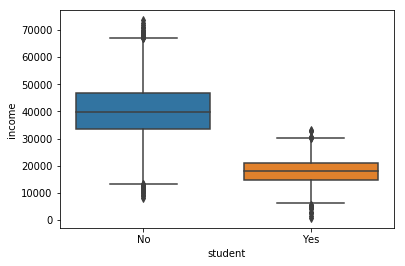

In [4]:
ax = sns.boxplot(x='student', y='income', data=df)  #x: agrupa, y: variable

- **Un boxplot del balance total de las cuentas, segmentado por el status de default.**

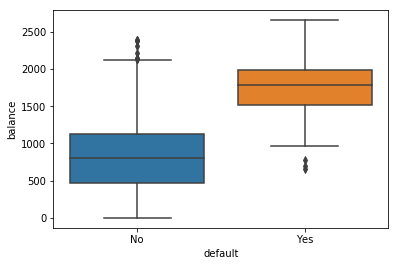

In [5]:
ax = sns.boxplot(x='default', y='balance', data=df)  #x: agrupa, y: variable

- **Un boxplot del ingreso total de cada cliente, segmentado por el status de default.**

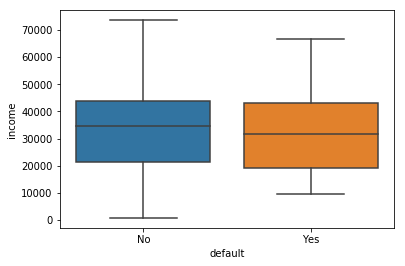

In [6]:
ax = sns.boxplot(x='default', y='income', data=df)  #x: agrupa, y: variable

- **Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de estudiante.**

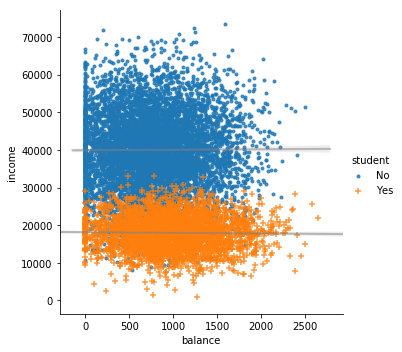

In [7]:
#g = sns.scatterplot(x='balance', y='income', hue='student', data=df)   #Bernarda dijo tamhbién sirve, lo cambié porque 
                                                                        #arriba dice 'lmplot'
g = sns.lmplot(x='balance', y='income', hue='student', markers = ['.','+'], line_kws={'color':'grey', 'alpha':0.5, 'lw':2},
               data= df)

- **Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de default.**

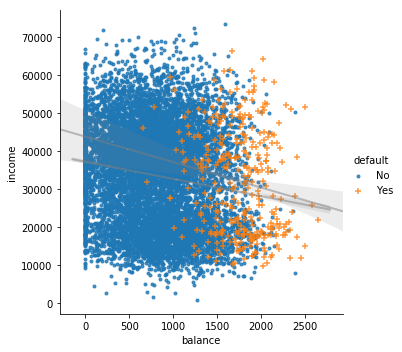

In [8]:
#sns.scatterplot(x='balance', y='income', hue='default', data=df) #Bernarda dijo tamhbién sirve, lo cambié porque 
                                                                        #arriba dice 'lmplot'
g = sns.lmplot(x='balance', y='income', hue='default', markers = ['.','+'], line_kws={'color':'grey', 'alpha':0.5, 'lw':2},
               data= df)

**Comente brevemente sobre los principales patrones de comportamiento.**
- *tip*: Puede utilizar el argumento `hue` en `lmplot` para identificar las observaciones por status.

***<span style="color:purple">
    Al observar los gráficos de caja, se observa que la mediana no se ubica al centro y en todos se observa valores atípicos (muy alejado, y que podrían afectar los resultados), sugiriendo entonces que no hay distribución normal de datos.
    En el caso de los gráficos de dispersión, agrupando por 'student' se observa que no habría correlación (recta sin pendiente), mientras que por 'default', sí se observa una correlación negativa.
</span>***

.  
### Desafío 3: Modelación econométrica
- Recodifique las variables `student` y `default` para que adquieran atributos numéricos.
- Implemente el siguiente modelo econométrico:

$$log\left(\frac{Pr(default=1)}{1-Pr(default=1)}\right) = \beta_0 + \beta_1 \cdot balance + \beta_2 \cdot income + \beta_3 \cdot student$$

- A partir de este modelo, depúrelo y mantenga las principales características. Ejecute de nuevo el modelo y comente brevemente sobre el comportamiento de los atributos.


In [9]:
df['bin_student'] = np.where(df['student'].str.strip() == 'No', 1, 0) #Si es = 1; si no = 0
df['bin_default'] = np.where(df['default'].str.strip() == 'No', 1, 0) #Si es = 1; si no = 0
df.head()

,index,default,student,balance,income,bin_student,bin_default
0,1,No,No,729.526495,44361.625074,1,1
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,1,1
3,4,No,No,529.250605,35704.493935,1,1
4,5,No,No,785.655883,38463.495879,1,1


In [10]:
# Realizar logit para generar modelo
model_logit = smf.logit('bin_default ~ balance + income + bin_student', df).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            bin_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        13:08:13   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.5158      0.438     26.299      0.000      10.658      12.374
balance        -0.0057      0.000    -24.737      0.000      -0.006      -0.005
income      -3.033e-06    8.2e-06     -0.370      0.712   -1.91e-05     1.3e-05
bin_student    -0.6468      0.236     -2.738      0.006      -1.110      -0.184
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
# Realizar logit para generar modelo
model2_logit = smf.logit('bin_default ~ balance + bin_student', df).fit()
model2_logit.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            bin_default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 Jul 2019   Pseudo R-squ.:                  0.4619
Time:                        13:08:13   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.4644      0.415     27.656      0.000      10.652      12.277
balance        -0.0057      0.000    -24.748      0.000      -0.006      -0.005
bin_student    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
===============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [12]:
print(f"Model:\n{model_logit.params}")
print(f"\nModel2:\n{model2_logit.params}")

Model:
Intercept      11.515821
balance        -0.005737
income         -0.000003
bin_student    -0.646776
dtype: float64

Model2:
Intercept      11.464374
balance        -0.005738
bin_student    -0.714878
dtype: float64


***<span style="color:purple">
    Al comparar los coeficientes de ambos modelos, se observa que `income` tiene un valor muy pequeño, por lo que al quitarlo, no se observa un gran cambio, siendo `balance` el que presenta menor diferencia.
</span>***

.  
### Desafío 4: Entrenar
A partir del modelo depurado, genere un modelo predictivo con las siguientes características:
- **Estandarize la matriz de atributos.**
- **Genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.**

In [13]:
df.head()

,index,default,student,balance,income,bin_student,bin_default
0,1,No,No,729.526495,44361.625074,1,1
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,1,1
3,4,No,No,529.250605,35704.493935,1,1
4,5,No,No,785.655883,38463.495879,1,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(df.loc[:, ['bin_student','balance']]),
                                                    df['bin_default'],
                                                    test_size=.33,     # guarda 33% de la muestra para validación
                                                    random_state=16254)

C:\Users\Latam-VyV\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Latam-VyV\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


- **Implemente el modelo sin alterar los hiperparámetros.**

In [15]:
# iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
  # 'y_train' ya es binario, no se estandariza
default_model = LogisticRegression().fit(X_train, y_train)

C:\Users\Latam-VyV\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
default_model.coef_

array([[-0.24403897, -2.6330636 ]])

In [17]:
default_model.intercept_

array([5.93334811])

- **Genere la predicción de las clases y de la probabilidad.**

In [18]:
#Generemos predicciones
yhat = default_model.predict(X_test)
yhat[:20]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
# preguntando por la probabilidad entre 0 y 1:
yhat_pr = default_model.predict_proba(X_test)
yhat_pr[:20]

array([[4.72327408e-04, 9.99527673e-01],
       [1.79379060e-03, 9.98206209e-01],
       [6.13335136e-03, 9.93866649e-01],
       [6.52612531e-01, 3.47387469e-01],
       [2.08587114e-04, 9.99791413e-01],
       [3.22168890e-02, 9.67783111e-01],
       [2.23407823e-03, 9.97765922e-01],
       [1.48599008e-03, 9.98514010e-01],
       [1.83532373e-04, 9.99816468e-01],
       [3.40570913e-03, 9.96594291e-01],
       [4.85239432e-03, 9.95147606e-01],
       [2.07115790e-03, 9.97928842e-01],
       [2.15795352e-03, 9.97842046e-01],
       [6.01474688e-05, 9.99939853e-01],
       [8.78250559e-03, 9.91217494e-01],
       [3.24124518e-02, 9.67587548e-01],
       [1.65403511e-03, 9.98345965e-01],
       [3.94853408e-05, 9.99960515e-01],
       [1.33241644e-02, 9.86675836e-01],
       [2.29178964e-04, 9.99770821e-01]])

- **Reporte las métricas de precision, recall y f1 para ambas clases.**

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.70      0.28      0.40       107
           1       0.98      1.00      0.99      3193

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.84      0.64      0.69      3300
weighted avg       0.97      0.97      0.97      3300



- **Grafique la curva Receiver Operator Characteristic.**

In [21]:
from sklearn.metrics import roc_curve

In [22]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1, clase 1:
yhat2 = default_model.predict_proba(X_test)[:, 1]

# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat2)

In [23]:
#verificar puntos generados!
false_positive.shape

(158,)

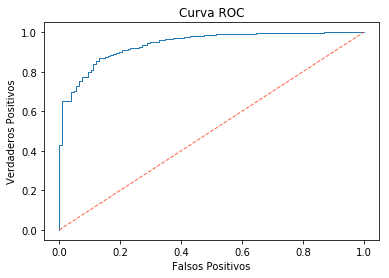

In [24]:
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1, color='tomato')  #bisectriz
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [25]:
# Estimar área bajo la curva:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat2)

0.9398362656629133

In [26]:
#Clasificador aleatorio: 50%, el nuestro dio 57%: 

- **En base a los pasos, comente sobre el desempeño predictivo del modelo.**

***<span style="color:purple">
    Al determinar el área bajo la curva, se observa que tenemos un 94%, mientras que un clasificador aleatorio, tendría un 50%. Es decir, nuestro clasificador mejora en un 54% la clasificación.
</span>***